<a href="https://colab.research.google.com/github/paneri21/NNDL-Lab-2022/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df=pd.read_csv("/Churnmodelling.csv")

In [6]:
df.drop('CustomerId',axis='columns',inplace=True)

In [7]:
df.dtypes

RowNumber            int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.drop(['RowNumber', 'Surname'],axis='columns',inplace=True)

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
df.shape

(10000, 11)

In [11]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2810,594,France,Female,30,10,0.00,2,1,1,124071.71,0
5155,713,France,Female,42,3,0.00,2,0,0,82565.01,0
809,657,France,Female,37,6,95845.60,1,1,0,122218.23,0
2929,744,Germany,Male,32,4,96106.83,1,1,1,79812.77,0
6260,666,France,Female,32,10,112536.57,2,1,1,34350.54,0


In [12]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [13]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5314,743,Germany,0,45,10,144677.19,3,1,0,22512.44,1
7797,502,Germany,0,33,5,174673.65,2,1,0,33300.56,0
2808,654,France,0,42,7,99263.09,1,1,1,67607.90,0
261,726,Spain,1,48,6,99906.19,1,1,0,64323.24,0
4332,507,Germany,0,31,2,134237.07,1,1,1,166423.66,1
2289,644,France,0,48,8,0.00,2,0,1,44965.54,1
8482,632,France,1,34,2,0.00,2,0,0,165385.55,0
752,490,France,1,35,7,107749.03,1,1,1,3937.37,0
1690,675,Spain,0,36,3,54098.18,2,0,1,54478.52,0
7320,850,Germany,1,31,1,130089.56,2,1,1,4466.21,0


In [14]:
df1 = pd.get_dummies(data=df, columns=['Geography'])

In [15]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
718,474,0,45,10,0.00,2,0,0,172175.90,0,1,0,0
1821,630,0,35,1,0.00,2,0,0,186826.22,0,0,0,1
6202,690,0,49,8,116622.73,1,0,1,51011.29,0,0,0,1
5210,551,0,35,7,129717.30,2,0,0,86937.20,0,1,0,0
6873,628,1,37,9,0.00,2,1,1,34689.77,0,1,0,0
5476,828,0,47,1,109876.82,2,1,0,83611.45,1,0,0,1
8563,578,0,45,1,148600.91,1,1,0,143397.14,1,1,0,0
3798,700,1,43,0,0.00,2,1,0,59475.35,0,0,0,1
9497,684,1,25,1,0.00,2,0,1,144978.47,0,1,0,0
1383,571,1,23,10,151097.28,1,0,1,17163.75,0,1,0,0


In [16]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


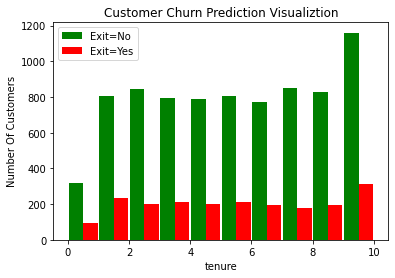

In [17]:
tenure_exit_no = df1[df1.Exited==0].Tenure
tenure_exit_yes = df1[df1.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_exit_no, tenure_exit_yes], rwidth=0.95, color=['green','red'],label=['Exit=No','Exit=Yes'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


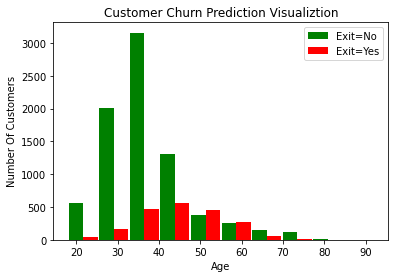

In [18]:
age_exit_no = df[df.Exited==0].Age
age_exit_yes = df[df.Exited==1].Age

plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([age_exit_no, age_exit_yes], rwidth=0.95, color=['green','red'],label=['Exit=No','Exit=Yes'])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


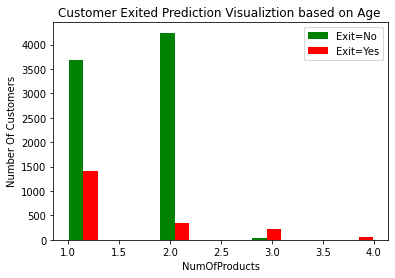

In [19]:
exited_no = df1[df1.Exited==0].NumOfProducts
exited_yes = df1[df1.Exited==1].NumOfProducts

plt.xlabel("NumOfProducts")
plt.ylabel("Number Of Customers")
plt.title("Customer Exited Prediction Visualiztion based on Age ")

plt.hist([exited_no,exited_yes], rwidth=0.95, color=['green','red'],label=['Exit=No','Exit=Yes'])
plt.legend()

In [20]:
cols_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [21]:
df1.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5158,0.474,0,0.500000,0.9,0.000000,0.0,1,0,0.322938,0,1,0,0
672,0.584,0,0.108108,0.0,0.000000,0.0,0,0,0.237328,0,1,0,0
3569,0.690,1,0.432432,0.8,0.000000,0.0,1,0,0.631910,1,1,0,0
6038,0.548,1,0.121622,0.7,0.417893,0.0,1,1,0.836959,0,0,1,0
1777,0.730,0,0.216216,0.4,0.495478,0.0,0,0,0.488903,0,1,0,0


In [22]:
df1.shape

(10000, 13)

In [23]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)


In [24]:
X_train.shape

(8000, 12)

In [25]:
X_test.shape

(2000, 12)

In [26]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
        keras.layers.Dense(12, input_shape = (12,), activation = 'relu'),
        keras.layers.Dense(12, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')]) 


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')
model.fit(X_train, y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4994 - accuracy: 0.7933
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8080
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.8108
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4272 - accuracy: 0.8142
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8183
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4100 - accuracy: 0.8220
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4000 - accuracy: 0.8246
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8294
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3806 - accuracy: 0.8359
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3734 - accura

In [27]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3606 - accuracy: 0.8465


[0.36059561371803284, 0.8464999794960022]

In [28]:
yp = model.predict(X_test)
yp[:5]

array([[0.05470467],
       [0.04215923],
       [0.0785484 ],
       [0.08669809],
       [0.07790202]], dtype=float32)

In [29]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [30]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [31]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      1595
           1       0.68      0.47      0.55       405

    accuracy                           0.85      2000
   macro avg       0.77      0.70      0.73      2000
weighted avg       0.83      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

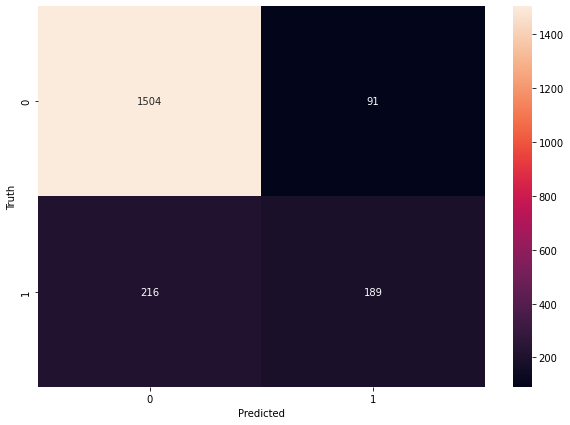

In [32]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
round((1520+192)/(1520+192+75+213),2)

0.86

## **Customers who didn't churn:**

In [34]:
round(1520/(1520+192),2)

0.89

## **Customers who churned:**

In [35]:
round(192/(192+75),2)

0.72

In [36]:
round(1520/(1520+75),2)

0.95

In [37]:
round(192/(213+192),2)

0.47